In [1]:
from __future__ import absolute_import, division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
imdb=keras.datasets.imdb

In [8]:
'''The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data.
The rare words are discarded to keep the size of the data manageable.
'''

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [14]:
'''Let's take a moment to understand the format of the data. 
The dataset comes preprocessed: each example is an array of integers representing the words of the movie review. 
Each label is an integer value of either 0 or 1, where 0 is a negative review, 
and 1 is a positive review.'''

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [15]:
'''The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary. 
Here's what the first review looks like:'''
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [16]:
'''Movie reviews may be different lengths. The below code shows the number of words in the first and second reviews.
Since inputs to a neural network must be the same length, we'll need to resolve this later.'''
len(train_data[0]), len(train_data[1])

(218, 189)

In [67]:
'''It may be useful to know how to convert integers back to text. 
Here, we'll create a helper function to query a dictionary object that contains the integer to string mapping:'''

word_index = imdb.get_word_index()

In [68]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [69]:
word_index={k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [70]:
reversed_word_index=dict([(v,k) for k,v in word_index.items()])

In [71]:
def decode_review(text):
    return ' '.join([reversed_word_index.get(i,'?') for i in text])

In [72]:
decode_review(train_data[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

In [ ]:
'''The reviews—the arrays of integers—must be converted to tensors before fed into the neural network. 
This conversion can be done a couple of ways:

Convert the arrays into vectors of 0s and 1s indicating word occurrence, 
similar to a one-hot encoding. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all 
zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense 
layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a 
num_words * num_reviews size matrix.

Alternatively, we can pad the arrays so they all have the same length, then create an integer tensor of shape 
max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.

In this tutorial, we will use the second approach.'''

In [75]:
#Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths:

train_data=keras.preprocessing.sequence.pad_sequences(train_data,
                                                     value=word_index["<PAD>"],
                                                    padding="post",
                                                    maxlen=256)

test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                     value=word_index["<PAD>"],
                                                    padding="post",
                                                    maxlen=256)

In [76]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [77]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [ ]:
'''Build the model
The neural network is created by stacking layers—this requires two main architectural decisions:

How many layers to use in the model?
How many hidden units to use for each layer?
In this example, the input data consists of an array of word-indices. The labels to predict are either 0 or 1. Let's build a model for this problem:'''

In [83]:

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''The layers are stacked sequentially to build the classifier:

The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).
Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.'''

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [85]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [93]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - ETA: 5s - loss: 0.6821 - acc: 0.744 - ETA: 4s - loss: 0.6818 - acc: 0.738 - ETA: 3s - loss: 0.6816 - acc: 0.733 - ETA: 3s - loss: 0.6815 - acc: 0.721 - ETA: 3s - loss: 0.6813 - acc: 0.721 - ETA: 2s - loss: 0.6810 - acc: 0.721 - ETA: 2s - loss: 0.6807 - acc: 0.724 - ETA: 2s - loss: 0.6806 - acc: 0.722 - ETA: 2s - loss: 0.6805 - acc: 0.719 - ETA: 2s - loss: 0.6802 - acc: 0.723 - ETA: 1s - loss: 0.6801 - acc: 0.724 - ETA: 1s - loss: 0.6798 - acc: 0.726 - ETA: 1s - loss: 0.6797 - acc: 0.724 - ETA: 1s - loss: 0.6794 - acc: 0.726 - ETA: 1s - loss: 0.6793 - acc: 0.726 - ETA: 1s - loss: 0.6791 - acc: 0.729 - ETA: 1s - loss: 0.6789 - acc: 0.730 - ETA: 1s - loss: 0.6785 - acc: 0.733 - ETA: 1s - loss: 0.6781 - acc: 0.735 - ETA: 0s - loss: 0.6780 - acc: 0.734 - ETA: 0s - loss: 0.6777 - acc: 0.734 - ETA: 0s - loss: 0.6776 - acc: 0.734 - ETA: 0s - loss: 0.6772 - acc: 0.736 - ETA: 0s - loss: 0.

15000/15000 [==============================] - ETA: 2s - loss: 0.4534 - acc: 0.861 - ETA: 2s - loss: 0.4578 - acc: 0.854 - ETA: 2s - loss: 0.4548 - acc: 0.853 - ETA: 2s - loss: 0.4539 - acc: 0.855 - ETA: 2s - loss: 0.4500 - acc: 0.862 - ETA: 2s - loss: 0.4494 - acc: 0.862 - ETA: 2s - loss: 0.4501 - acc: 0.860 - ETA: 2s - loss: 0.4496 - acc: 0.860 - ETA: 1s - loss: 0.4502 - acc: 0.860 - ETA: 1s - loss: 0.4495 - acc: 0.859 - ETA: 1s - loss: 0.4488 - acc: 0.859 - ETA: 1s - loss: 0.4489 - acc: 0.858 - ETA: 1s - loss: 0.4489 - acc: 0.857 - ETA: 1s - loss: 0.4495 - acc: 0.856 - ETA: 1s - loss: 0.4479 - acc: 0.856 - ETA: 1s - loss: 0.4466 - acc: 0.856 - ETA: 1s - loss: 0.4459 - acc: 0.857 - ETA: 1s - loss: 0.4450 - acc: 0.856 - ETA: 0s - loss: 0.4440 - acc: 0.857 - ETA: 0s - loss: 0.4434 - acc: 0.856 - ETA: 0s - loss: 0.4429 - acc: 0.857 - ETA: 0s - loss: 0.4432 - acc: 0.856 - ETA: 0s - loss: 0.4428 - acc: 0.856 - ETA: 0s - loss: 0.4425 - acc: 0.857 - ETA: 0s - loss: 0.4407 - acc: 0.858 - ETA

15000/15000 [==============================] - ETA: 2s - loss: 0.2935 - acc: 0.912 - ETA: 2s - loss: 0.2980 - acc: 0.899 - ETA: 2s - loss: 0.2951 - acc: 0.899 - ETA: 2s - loss: 0.2951 - acc: 0.900 - ETA: 2s - loss: 0.2937 - acc: 0.900 - ETA: 2s - loss: 0.2898 - acc: 0.902 - ETA: 2s - loss: 0.2878 - acc: 0.903 - ETA: 1s - loss: 0.2871 - acc: 0.903 - ETA: 1s - loss: 0.2844 - acc: 0.904 - ETA: 1s - loss: 0.2856 - acc: 0.901 - ETA: 1s - loss: 0.2864 - acc: 0.901 - ETA: 1s - loss: 0.2848 - acc: 0.901 - ETA: 1s - loss: 0.2842 - acc: 0.901 - ETA: 1s - loss: 0.2851 - acc: 0.900 - ETA: 1s - loss: 0.2857 - acc: 0.900 - ETA: 1s - loss: 0.2863 - acc: 0.899 - ETA: 1s - loss: 0.2863 - acc: 0.899 - ETA: 1s - loss: 0.2868 - acc: 0.899 - ETA: 1s - loss: 0.2869 - acc: 0.899 - ETA: 0s - loss: 0.2859 - acc: 0.899 - ETA: 0s - loss: 0.2857 - acc: 0.900 - ETA: 0s - loss: 0.2845 - acc: 0.901 - ETA: 0s - loss: 0.2850 - acc: 0.900 - ETA: 0s - loss: 0.2840 - acc: 0.901 - ETA: 0s - loss: 0.2836 - acc: 0.902 - ETA

15000/15000 [==============================] - ETA: 2s - loss: 0.2045 - acc: 0.937 - ETA: 2s - loss: 0.2031 - acc: 0.937 - ETA: 2s - loss: 0.2037 - acc: 0.932 - ETA: 2s - loss: 0.2051 - acc: 0.933 - ETA: 2s - loss: 0.2022 - acc: 0.933 - ETA: 2s - loss: 0.1999 - acc: 0.937 - ETA: 1s - loss: 0.2044 - acc: 0.935 - ETA: 1s - loss: 0.2040 - acc: 0.935 - ETA: 1s - loss: 0.2062 - acc: 0.934 - ETA: 1s - loss: 0.2065 - acc: 0.933 - ETA: 1s - loss: 0.2059 - acc: 0.933 - ETA: 1s - loss: 0.2065 - acc: 0.932 - ETA: 1s - loss: 0.2060 - acc: 0.931 - ETA: 1s - loss: 0.2063 - acc: 0.931 - ETA: 1s - loss: 0.2058 - acc: 0.931 - ETA: 1s - loss: 0.2050 - acc: 0.932 - ETA: 1s - loss: 0.2055 - acc: 0.932 - ETA: 0s - loss: 0.2055 - acc: 0.932 - ETA: 0s - loss: 0.2055 - acc: 0.932 - ETA: 0s - loss: 0.2071 - acc: 0.930 - ETA: 0s - loss: 0.2070 - acc: 0.930 - ETA: 0s - loss: 0.2070 - acc: 0.930 - ETA: 0s - loss: 0.2065 - acc: 0.931 - ETA: 0s - loss: 0.2066 - acc: 0.931 - ETA: 0s - loss: 0.2070 - acc: 0.931 - ETA

15000/15000 [==============================] - ETA: 2s - loss: 0.1576 - acc: 0.964 - ETA: 2s - loss: 0.1641 - acc: 0.955 - ETA: 2s - loss: 0.1588 - acc: 0.958 - ETA: 2s - loss: 0.1573 - acc: 0.956 - ETA: 2s - loss: 0.1631 - acc: 0.953 - ETA: 2s - loss: 0.1650 - acc: 0.952 - ETA: 2s - loss: 0.1664 - acc: 0.951 - ETA: 1s - loss: 0.1661 - acc: 0.952 - ETA: 1s - loss: 0.1674 - acc: 0.951 - ETA: 1s - loss: 0.1663 - acc: 0.951 - ETA: 1s - loss: 0.1688 - acc: 0.950 - ETA: 1s - loss: 0.1678 - acc: 0.950 - ETA: 1s - loss: 0.1688 - acc: 0.949 - ETA: 1s - loss: 0.1680 - acc: 0.949 - ETA: 1s - loss: 0.1668 - acc: 0.950 - ETA: 1s - loss: 0.1683 - acc: 0.948 - ETA: 1s - loss: 0.1681 - acc: 0.948 - ETA: 1s - loss: 0.1684 - acc: 0.947 - ETA: 0s - loss: 0.1670 - acc: 0.948 - ETA: 0s - loss: 0.1651 - acc: 0.949 - ETA: 0s - loss: 0.1645 - acc: 0.949 - ETA: 0s - loss: 0.1650 - acc: 0.949 - ETA: 0s - loss: 0.1645 - acc: 0.949 - ETA: 0s - loss: 0.1643 - acc: 0.949 - ETA: 0s - loss: 0.1632 - acc: 0.949 - ETA

15000/15000 [==============================] - ETA: 2s - loss: 0.1336 - acc: 0.960 - ETA: 2s - loss: 0.1211 - acc: 0.967 - ETA: 1s - loss: 0.1233 - acc: 0.966 - ETA: 1s - loss: 0.1247 - acc: 0.966 - ETA: 1s - loss: 0.1242 - acc: 0.966 - ETA: 1s - loss: 0.1259 - acc: 0.965 - ETA: 1s - loss: 0.1253 - acc: 0.965 - ETA: 1s - loss: 0.1237 - acc: 0.965 - ETA: 1s - loss: 0.1235 - acc: 0.966 - ETA: 1s - loss: 0.1220 - acc: 0.967 - ETA: 1s - loss: 0.1235 - acc: 0.967 - ETA: 1s - loss: 0.1229 - acc: 0.966 - ETA: 1s - loss: 0.1224 - acc: 0.966 - ETA: 1s - loss: 0.1222 - acc: 0.966 - ETA: 1s - loss: 0.1222 - acc: 0.966 - ETA: 1s - loss: 0.1237 - acc: 0.965 - ETA: 1s - loss: 0.1278 - acc: 0.963 - ETA: 0s - loss: 0.1292 - acc: 0.962 - ETA: 0s - loss: 0.1294 - acc: 0.962 - ETA: 0s - loss: 0.1288 - acc: 0.962 - ETA: 0s - loss: 0.1284 - acc: 0.963 - ETA: 0s - loss: 0.1285 - acc: 0.963 - ETA: 0s - loss: 0.1282 - acc: 0.963 - ETA: 0s - loss: 0.1280 - acc: 0.963 - ETA: 0s - loss: 0.1276 - acc: 0.963 - ETA

15000/15000 [==============================] - ETA: 2s - loss: 0.0949 - acc: 0.966 - ETA: 2s - loss: 0.1035 - acc: 0.966 - ETA: 2s - loss: 0.1032 - acc: 0.966 - ETA: 2s - loss: 0.1001 - acc: 0.969 - ETA: 2s - loss: 0.1011 - acc: 0.970 - ETA: 1s - loss: 0.1007 - acc: 0.970 - ETA: 1s - loss: 0.1029 - acc: 0.969 - ETA: 1s - loss: 0.1048 - acc: 0.969 - ETA: 1s - loss: 0.1037 - acc: 0.969 - ETA: 1s - loss: 0.1062 - acc: 0.968 - ETA: 1s - loss: 0.1068 - acc: 0.968 - ETA: 1s - loss: 0.1063 - acc: 0.969 - ETA: 1s - loss: 0.1058 - acc: 0.969 - ETA: 1s - loss: 0.1059 - acc: 0.970 - ETA: 1s - loss: 0.1058 - acc: 0.970 - ETA: 1s - loss: 0.1064 - acc: 0.970 - ETA: 1s - loss: 0.1055 - acc: 0.970 - ETA: 1s - loss: 0.1063 - acc: 0.970 - ETA: 0s - loss: 0.1062 - acc: 0.970 - ETA: 0s - loss: 0.1055 - acc: 0.970 - ETA: 0s - loss: 0.1052 - acc: 0.970 - ETA: 0s - loss: 0.1049 - acc: 0.970 - ETA: 0s - loss: 0.1046 - acc: 0.970 - ETA: 0s - loss: 0.1047 - acc: 0.970 - ETA: 0s - loss: 0.1041 - acc: 0.970 - ETA

In [94]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - ETA: 8s - loss: 0.2936 - acc: 0.875 - ETA: 2s - loss: 0.3163 - acc: 0.869 - ETA: 2s - loss: 0.2997 - acc: 0.876 - ETA: 2s - loss: 0.3081 - acc: 0.876 - ETA: 2s - loss: 0.3132 - acc: 0.876 - ETA: 2s - loss: 0.3153 - acc: 0.877 - ETA: 2s - loss: 0.3105 - acc: 0.879 - ETA: 2s - loss: 0.3142 - acc: 0.876 - ETA: 2s - loss: 0.3211 - acc: 0.874 - ETA: 2s - loss: 0.3229 - acc: 0.874 - ETA: 2s - loss: 0.3236 - acc: 0.874 - ETA: 2s - loss: 0.3232 - acc: 0.872 - ETA: 2s - loss: 0.3206 - acc: 0.872 - ETA: 2s - loss: 0.3261 - acc: 0.871 - ETA: 1s - loss: 0.3270 - acc: 0.871 - ETA: 1s - loss: 0.3239 - acc: 0.873 - ETA: 1s - loss: 0.3207 - acc: 0.874 - ETA: 1s - loss: 0.3232 - acc: 0.874 - ETA: 1s - loss: 0.3273 - acc: 0.872 - ETA: 1s - loss: 0.3307 - acc: 0.870 - ETA: 1s - loss: 0.3335 - acc: 0.869 - ETA: 1s - loss: 0.3375 - acc: 0.869 - ETA: 1s - loss: 0.3366 - acc: 0.869 - ETA: 1s - loss: 0.3365 - acc: 0.869 - ETA: 1s - loss: 0.3336 - acc: 0.870 - ETA

In [95]:
history_dict = history.history
history_dict.items()

dict_items([('loss', [0.6753255255063375, 0.6530637384732564, 0.6192547874768575, 0.5767793494860332, 0.5297266829490661, 0.48288914891878765, 0.43944395345052084, 0.4010259724299113, 0.3684559062639872, 0.34089263134002684, 0.31832575971285504, 0.29794745294253033, 0.28092547346750896, 0.26563704216480255, 0.25155585827827454, 0.2390982800324758, 0.2278213806072871, 0.2176586569150289, 0.20740175221761067, 0.19875442547003427, 0.19003191572825115, 0.18249300864537557, 0.17472653814951578, 0.16783838665485382, 0.16130062727928163, 0.15504068706830343, 0.14962983474731445, 0.1438675153573354, 0.13813541933695475, 0.1328749571442604, 0.12784103430112204, 0.12335222373008728, 0.11922425051530203, 0.1146724260409673, 0.11034000882307689, 0.10635087982813517, 0.10313601607879003, 0.09908761161963145, 0.09560657384395599, 0.0917603228410085]), ('acc', [0.7424, 0.76033336, 0.7891333, 0.8099333, 0.8258, 0.8445333, 0.85906667, 0.87226665, 0.88013333, 0.8886, 0.8936, 0.8990667, 0.9036667, 0.9084

In [ ]:
'''There are four entries: one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, 
as well as the training and validation accuracy:'''

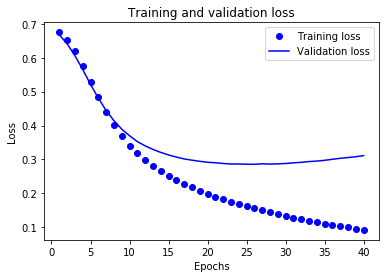

In [96]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

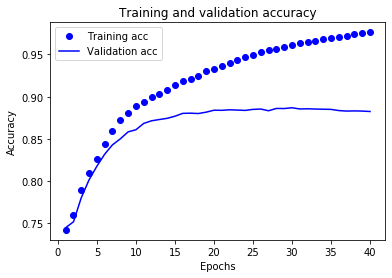

In [97]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()